In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


warnings. filterwarnings('ignore')
pd.set_option('display.max_columns',None)


In [2]:
credit = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv') 

In [3]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print('Credit:',credit.shape)
print('Movie:',movies.shape)

Credit: (4803, 4)
Movie: (4803, 20)


In [6]:
credit = credit.rename(index=str,columns={'movie_id':'id'})
credit.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
###### merging the two datasets

movie_merge = pd.merge(credit,movies,on='id')
movie_merge.head()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
movie_merge.shape

(4803, 23)

In [10]:
movie_merge.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [11]:
movie_merge['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [12]:
movie_merge_clean = movie_merge.drop(['title_x','homepage','production_countries','title_y','status'],axis=1)

In [13]:
movie_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   cast                  4803 non-null   object 
 2   crew                  4803 non-null   object 
 3   budget                4803 non-null   int64  
 4   genres                4803 non-null   object 
 5   keywords              4803 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  tagline              

In [14]:
C = movie_merge_clean['vote_average'].mean()

In [15]:
v= movie_merge_clean['vote_count']
R= movie_merge_clean['vote_average']
C= C
m = movie_merge_clean['vote_count'].quantile(.7)

In [16]:
movie_merge_clean['weighted_average'] = ((R*v)+(C*m))/(v+m)

In [17]:
movie_merge_clean.head()

,id,cast,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,weighted_average
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,7.148013
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,6.807627
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,6.276075
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,7.509565
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,6.098319


In [18]:
movie_rank = movie_merge_clean.sort_values('weighted_average',ascending = False)
movie_rank.head(10)

,id,cast,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,weighted_average
1881,278,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...","[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,8.340775
3337,238,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...","[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",An offer you can't refuse.,8.4,5893,8.192887
662,550,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",63000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,8.171648
3232,680,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...","[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Just because you are a character doesn't mean ...,8.3,8428,8.157615
65,155,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,8.102674
809,13,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de...",55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",1994-07-06,677945399,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",8.2,7927,8.056059
1818,424,"[{""cast_id"": 14, ""character"": ""Oskar Schindler...","[{""credit_id"": ""52fe4242c3a36847f8010303"", ""de...",22000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 1382, ""name"": ""factory""}, {""id"": 1631,...",en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",1993-11-29,321365567,195.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...","Whoever saves one life, saves the world entire.",8.3,4329,8.038748
3865,244786,"[{""cast_id"": 5, ""character"": ""Andrew Neimann"",...","[{""credit_id"": ""54d

In [19]:
movie_merge_clean.columns

Index(['id', 'cast', 'crew', 'budget', 'genres', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'weighted_average'],
      dtype='object')

In [20]:
movie_rank[['id','original_language','original_title','popularity','vote_average','vote_count','weighted_average']].head(10)

,id,original_language,original_title,popularity,vote_average,vote_count,weighted_average
1881,278,en,The Shawshank Redemption,136.747729,8.5,8205,8.340775
3337,238,en,The Godfather,143.659698,8.4,5893,8.192887
662,550,en,Fight Club,146.757391,8.3,9413,8.171648
3232,680,en,Pulp Fiction,121.463076,8.3,8428,8.157615
65,155,en,The Dark Knight,187.322927,8.2,12002,8.102674
809,13,en,Forrest Gump,138.133331,8.2,7927,8.056059
1818,424,en,Schindler's List,104.469351,8.3,4329,8.038748
3865,244786,en,Whiplash,192.528841,8.3,4254,8.034695
96,27205,en,Inception,167.583710,8.1,13752,8.018611
1990,1891,en,The Empire Strikes Back,78.517830,8.2,5879,8.010426


Text(0.5, 1.0, 'Best movie by average score')

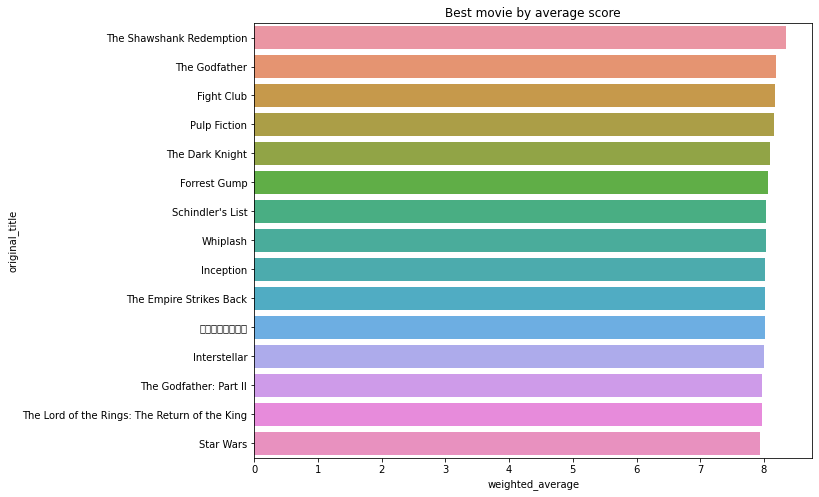

In [21]:
wa = movie_rank.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(y=wa['original_title'].head(15),x=wa['weighted_average'].head(15))
plt.title('Best movie by average score')

Text(0.5, 1.0, 'Best movie by Popularity')

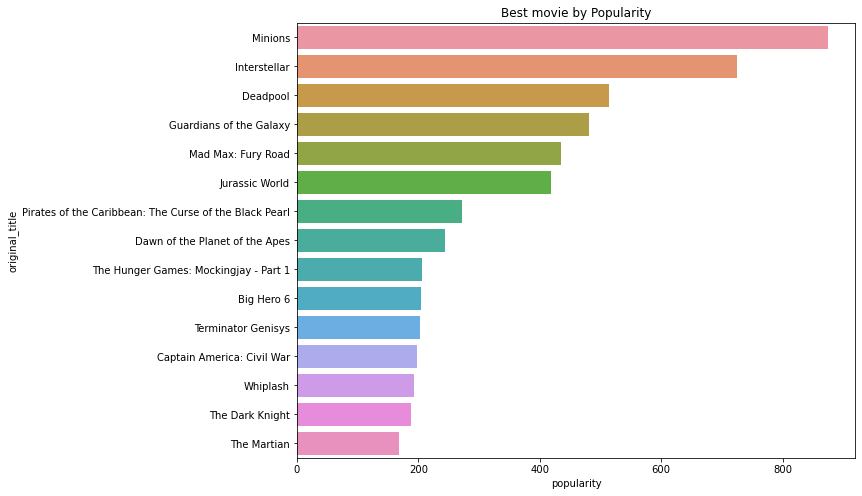

In [22]:
pop = movie_rank.sort_values('popularity',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(y=pop['original_title'].head(15),x=pop['popularity'].head(15))
plt.title('Best movie by Popularity')

### Recommendation for both Weighted Average and Popularity (50% - 50%)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaled_movies= MinMaxScaler().fit_transform(movie_merge_clean[['weighted_average','popularity']])
normalised_movie = pd.DataFrame(scaled_movies,columns=['Weighted Average','Popularity'])
normalised_movie

,Weighted Average,Popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169
...,...,...
4798,0.426353,0.016298
4799,0.385613,0.000734
4800,0.388595,0.001650
4801,0.384786,0.000979


In [24]:
movie_rank[['Normalised Weights','Normalised Population']] = normalised_movie
movie_rank

,id,cast,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,weighted_average,Normalised Weights,Normalised Population
1881,278,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...","[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,8.340775,1.000000,0.156179
3337,238,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...","[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",An offer you can't refuse.,8.4,5893,8.192887,0.959622,0.164074
662,550,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",63000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,8.171648,0.953823,0.167611
3232,680,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...","[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Just because you are a character doesn't mean ...,8.3,8428,8.157615,0.949991,0.138723
65,155,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,8.102674,0.934991,0.213941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,314,"[{""cast_id"": 2, ""character"": ""Patience Phillip...","[{""credit_id"": ""52fe4236c3a36847f800caa1"", ""de...",100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 418, ""name"": ""white russian""}, {""id"": ...",en,Catwoman,Liquidated after discovering a corporate consp...,32.271938,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2004-07-22,82102379,104.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",CATch her in IMAX,4.2,808,4.991470,0.085535,0.036858
3746,241251,"[{""cast_id"": 3, ""character"": ""Claire Peterson""...","[{""credit_id"": ""55423058c3a3681da0003d57"", ""de...",4000000,"[{""id"": 53, ""name"": ""Thriller""}]","[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",en,The Boy Next Door,A recently cheated on married woman falls for ...,24.161735,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-01-23,52425855,91.0,"[{""iso_639_1"": ""en"", ""

In [25]:
movie_rank['Score'] = movie_rank['Normalised Weights']*.5 + movie_rank['Normalised Population']*.5
movie_rank = movie_rank.sort_values(['Score'],ascending=False)
movie_rank

,id,cast,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,weighted_average,Normalised Weights,Normalised Population,Score
95,157336,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,7.998100,0.906439,0.827162,0.866801
546,211672,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...","[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,6.365286,0.460630,1.000000,0.730315
94,118340,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,7.798252,0.851874,0.549462,0.700668
788,293660,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,7.334360,0.725217,0.587690,0.656453
127,76341,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,7.135687,0.670973,0.495989,0.583481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,9760,"[{""cast_id"": 1, ""character"": ""Edward"", ""credit...","[{""credit_id"": ""56348a269251412857016e9e"", ""de...",20000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",[],en,Epic Movie,"When Edward, Peter, Lucy and Susan each follow...",6.064638,"[{""name"": ""Twentieth Century Fox Film Corporat...",2007-01-25,86865564,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",We know it's big. We measured.,3.2,326,5.052648,0.102239,0.006926,0.054583
210,415,"[{""cast_id"": 4, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""59b66a169251417cbc011ec4"", ""de...",125000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman & Robin,Along with crime-fighting partner Robin and ne...,50.073575,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...",1997-06-20,238207122,1

In [28]:
movie_rank[['original_title','weighted_average','vote_count','vote_average','Score','Normalised Weights','Normalised Population']].sort_values('Score',ascending=False)

,original_title,weighted_average,vote_count,vote_average,Score,Normalised Weights,Normalised Population
95,Interstellar,7.998100,10867,8.1,0.866801,0.906439,0.827162
546,Minions,6.365286,4571,6.4,0.730315,0.460630,1.000000
94,Guardians of the Galaxy,7.798252,9742,7.9,0.700668,0.851874,0.549462
788,Deadpool,7.334360,10995,7.4,0.656453,0.725217,0.587690
127,Mad Max: Fury Road,7.135687,9427,7.2,0.583481,0.670973,0.495989
...,...,...,...,...,...,...,...
2122,Epic Movie,5.052648,326,3.2,0.054583,0.102239,0.006926
210,Batman & Robin,4.749951,1418,4.2,0.038391,0.019593,0.057189
3746,The Boy Next Door,4.822053,1022,4.1,0.033437,0.039279,0.027595
242,Fantastic Four,4.743880,2278,4.4,0.030740,0.017935,0.043544


Text(0.5, 1.0, 'Best movie by Score')

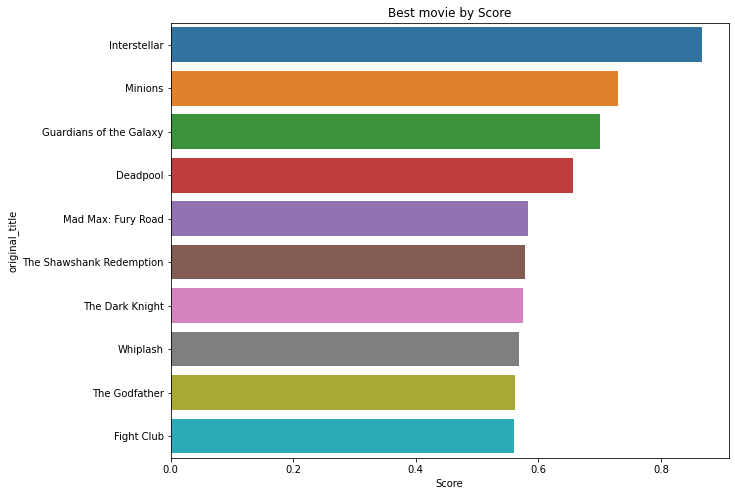

In [29]:
Score = movie_rank.sort_values('Score',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(y=Score['original_title'].head(10),x=Score['Score'].head(10))
plt.title('Best movie by Score')